<a href="https://colab.research.google.com/github/Mohit1-K/House-prediction-Advanced-regression-techniques-/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train= pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test= pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [ ]:
final= pd.concat([train, test], axis=0)

In [ ]:
final.drop('SalePrice', axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
main=final.copy()

In [ ]:
main.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


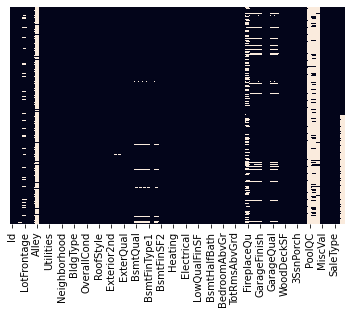

In [ ]:
sns.heatmap(final.isnull(), yticklabels= False, cbar= False)

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
final['LotFrontage']= final['LotFrontage'].fillna(final['LotFrontage'].mean())

In [ ]:
final['MSZoning']= final['MSZoning'].fillna(final['MSZoning'].mode()[0])
final['Utilities']= final['Utilities'].fillna(final['Utilities'].mode()[0])

In [ ]:
final['Exterior1st']= final['Exterior1st'].fillna(final['Exterior1st'].mode()[0])
final['Exterior2nd']= final['Exterior2nd'].fillna(final['Exterior2nd'].mode()[0])

In [ ]:
final['Alley']= final['Alley'].fillna(final['Alley'].mode()[0])

In [ ]:
final['MasVnrType']= final['MasVnrType'].fillna(final['MasVnrType'].mode()[0])

In [ ]:
final['MasVnrArea']= final['MasVnrArea'].fillna(final['MasVnrArea'].mean())

In [ ]:
final['BsmtQual']= final['BsmtQual'].fillna(final['BsmtQual'].mode()[0])

In [ ]:
final['BsmtCond']= final['BsmtCond'].fillna(final['BsmtCond'].mode()[0])

In [ ]:
final['BsmtExposure']= final['BsmtExposure'].fillna(final['BsmtExposure'].mode()[0])

In [ ]:
final['BsmtFinType1']= final['BsmtFinType1'].fillna(final['BsmtFinType1'].mode()[0])

In [ ]:
final['BsmtFinType2']= final['BsmtFinType2'].fillna(final['BsmtFinType2'].mode()[0])

In [ ]:
final['BsmtFinSF1']= final['BsmtFinSF1'].fillna(final['BsmtFinSF1'].mean())
final['BsmtFinSF2']= final['BsmtFinSF2'].fillna(final['BsmtFinSF2'].mean())

In [ ]:
final['BsmtUnfSF']= final['BsmtUnfSF'].fillna(final['BsmtUnfSF'].mean())
final['TotalBsmtSF']= final['TotalBsmtSF'].fillna(final['TotalBsmtSF'].mean())
final['BsmtFullBath'] = final['BsmtFullBath'].fillna(final['BsmtFullBath'].mean())
final['BsmtHalfBath']= final['BsmtHalfBath'].fillna(final['BsmtHalfBath'].mean())

In [ ]:
final['Electrical']= final['Electrical'].fillna(final['Electrical'].mode()[0])

In [ ]:
final['FireplaceQu']= final['FireplaceQu'].fillna(final['FireplaceQu'].mode()[0])

In [ ]:
final['KitchenQual']= final['KitchenQual'].fillna(final['KitchenQual'].mode()[0])

In [ ]:
final['GarageYrBlt']= final['GarageYrBlt'].fillna(final['GarageYrBlt'].mean())

In [ ]:
final['GarageType']= final['GarageType'].fillna(final['GarageType'].mode()[0])

In [ ]:
final['GarageFinish']= final['GarageFinish'].fillna(final['GarageFinish'].mode()[0])

In [ ]:
final['GarageQual']= final['GarageQual'].fillna(final['GarageQual'].mode()[0])

In [ ]:
final['GarageCond']= final['GarageCond'].fillna(final['GarageCond'].mode()[0])

In [ ]:
final['GarageArea']= final['GarageArea'].fillna(final['GarageArea'].mode()[0])

In [ ]:
final['GarageCars']= final['GarageCars'].fillna(final['GarageCars'].mode()[0])

In [ ]:
final['Functional']= final['Functional'].fillna(final['Functional'].mode()[0])

In [ ]:
final['PoolQC']= final['PoolQC'].fillna(final['PoolQC'].mode()[0])

In [ ]:
final['Fence']= final['Fence'].fillna(final['Fence'].mode()[0])

In [ ]:
final['MiscFeature']= final['MiscFeature'].fillna(final['MiscFeature'].mode()[0])

In [ ]:
final['SaleType']= final['SaleType'].fillna(final['SaleType'].mode()[0])

In [ ]:
final.shape

(2919, 81)

In [ ]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Alley',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond','PoolQC','Fence','MiscFeature',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
def onehot_multicolumns(multicolumns):
    df_final=final
    i=0
    for fields in multicolumns:
        
        print(fields)
        df1=pd.get_dummies(final[fields],drop_first=True)
        
        final.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final,df_final],axis=1)
        
    return df_final

In [ ]:
final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000.0


In [ ]:
final["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [ ]:
final= onehot_multicolumns(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Alley
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
PoolQC
Fence
MiscFeature
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [ ]:
final.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,1,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,1,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
final= final.loc[:,~final.columns.duplicated()]

In [ ]:
final.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,1,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,1,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,1,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
final['Id']

0          1
1          2
2          3
3          4
4          5
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 2919, dtype: int64

In [ ]:
dtrain= final.iloc[:1460,:]
dtest= final.iloc[1460:,:]

In [ ]:
dtrain.isna().sum().sum()
#dtest.dtypes

0

In [ ]:
dtest.isna().sum().sum()

1459

In [ ]:
dtest.drop('SalePrice', axis=1, inplace= True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train= dtrain.drop('SalePrice', axis=1)
y_train= dtrain['SalePrice']
X_test= dtest

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import KFold



In [ ]:
C=[0.05,0.08,0.1]

In [ ]:
random_state=1
rf_params = {"max_depth": 8, "max_features": 40, "n_estimators": 132}
svr_params = {
    "kernel": "poly",
    "C": 0.056789,
    "epsilon": 0.03925943476562099,
    "coef0": 0.9486751042886584,
}
ridge_params = {
    "alpha": 0.9999189637151178,
    "tol": 0.8668539399622242,
    "solver": "cholesky",
}
lasso_params = {"alpha": 0.0004342843645993161, "selection": "random"}
lgbm_params = {
    "num_leaves": 16,
    "max_depth": 6,
    "learning_rate": 0.16060612646519587,
    "n_estimators": 64,
    "min_child_weight": 0.4453842422224686,
}

In [ ]:
cv = KFold(n_splits=4, random_state=random_state)

svr = SVR(**svr_params)
ridge = Ridge(**ridge_params, random_state=random_state)
lasso = Lasso(**lasso_params, random_state=random_state)
lgbm = LGBMRegressor(**lgbm_params, random_state=random_state)
rf = RandomForestRegressor(**rf_params, random_state=random_state)
stack = StackingCVRegressor(
    regressors=[svr, ridge, lasso, lgbm, rf],
    meta_regressor=LinearRegression(n_jobs=-1),
    random_state=random_state,
    cv=cv,
    n_jobs=-1,
)

svr_scores = cross_val_score(
    svr, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
ridge_scores = cross_val_score(
    ridge, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
lasso_scores = cross_val_score(
    lasso, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
lgbm_scores = cross_val_score(
    lgbm, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
rf_scores = cross_val_score(
    rf, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)
stack_scores = cross_val_score(
    stack, X_train, y_train, cv=cv, n_jobs=-1, error_score="neg_root_mean_squared_error"
)

scores = [svr_scores, ridge_scores, lasso_scores, lgbm_scores, rf_scores, stack_scores]
models = ["SVR", "RIDGE", "LASSO", "LGBM", "RF", "STACK"]
score_medians = [
    round(np.median([mean for mean in modelscore]), 5) for modelscore in scores
]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NameError: name 'X_train' is not defined

In [ ]:
stack.fit(X_train, y_train)

In [ ]:
pred= stack.predict(dtest)

In [ ]:
dict = {'Id': dtest['Id'], 'SalePrice': pred}  

     

df = pd.DataFrame(dict) 
df.to_csv('file.csv', index=False)
df.head()

In [ ]:
data= pd.read_csv('./file.csv')
data.head()